# Import dataset from kagglehub

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/mbti-type")

print("Path to dataset files:", path)

Path to dataset files: /Users/yourus_m/.cache/kagglehub/datasets/datasnaek/mbti-type/versions/1


# Import data from pc

In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/yourus_m/.cache/kagglehub/datasets/datasnaek/mbti-type/versions/1/mbti_1.csv', on_bad_lines='skip')

In [3]:
print(df.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


The dataset consists of two columns: Type and Posts.

- **Type** refers to the MBTI (Myers-Briggs Type Indicator) personality classification, which includes 16 types: ENTJ, ENFJ, ESFJ, ESTJ, ENTP, ENFP, ESFP, ESTP, INTJ, INFJ, ISFJ, ISTJ, INTP, INFP, ISFP, and ISTP.

- **Posts** contains text entries gathered from the internet. Each post reflects the personality of the individual—through their writing style, emotional tone, and even the way they construct thoughts and sentences. These patterns can be linked to their MBTI type, offering insight into how personality manifests in language.

In [4]:
num_rows = len(df)
print(f'Total number of rows: {num_rows}')

Total number of rows: 8675


Total number of rows equals a sum of observations being collected in this dataset which this dataset has overall 8675 observations. 

In [5]:
print(df.isnull().sum())

type     0
posts    0
dtype: int64


There's no null value in this dataset

In [6]:
print(df.describe())

        type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


The dataset contains a total of 8,675 observations spanning all 16 MBTI types. Among them, INFP is the most frequently occurring type, appearing 1,832 times, making it the most represented personality type in the dataset.

In [7]:
print(df.columns)
print(df.head(2))

Index(['type', 'posts'], dtype='object')
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...


In [8]:
# Split into separate post blocks
df['post_blocks'] = df['posts'].str.split(r'\|\|\|')
print(df['post_blocks'])

0       ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...
1       ['I'm finding the lack of me in these posts ve...
2       ['Good one  _____   https://www.youtube.com/wa...
3       ['Dear INTP,   I enjoyed our conversation the ...
4       ['You're fired., That's another silly misconce...
                              ...                        
8670    ['https://www.youtube.com/watch?v=t8edHB_h908,...
8671    ['So...if this thread already exists someplace...
8672    ['So many questions when i do these things.  I...
8673    ['I am very conflicted right now when it comes...
8674    ['It has been too long since I have been on pe...
Name: post_blocks, Length: 8675, dtype: object


# Behavioral Profiling

## 1. Extract URLs from Posts

In [9]:
import re

def extract_links(blocks):
    return [b for b in blocks if re.search(r'(https?://)', b)]

df['links'] = df['post_blocks'].apply(extract_links)
print(df['links'])

0       ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...
1       [http://img188.imageshack.us/img188/6422/6020d...
2       ['Good one  _____   https://www.youtube.com/wa...
3       [Sx as hell...   https://www.youtube.com/watch...
4       [Sometimes I just really like impoverished rap...
                              ...                        
8670    ['https://www.youtube.com/watch?v=t8edHB_h908,...
8671    ['So...if this thread already exists someplace...
8672    [Oh and: Mountain dew releases mountain flavor...
8673                                                   []
8674    [http://www.youtube.com/watch?v=6EEW-9NDM5k, h...
Name: links, Length: 8675, dtype: object


Extract links (URLs) from all posts -- without texts or emojis

## 2. Extract Only Text Blocks

Extract only texts from all posts without links

In [10]:
def extract_text(blocks):
    return [b.strip() for b in blocks if not re.search(r'https?://', b)]

df['text_only'] = df['post_blocks'].apply(extract_text)

In [11]:
print(df['text_only'])

0       [What has been the most life-changing experien...
1       ['I'm finding the lack of me in these posts ve...
2       [Of course, to which I say I know; that's my b...
3       ['Dear INTP,   I enjoyed our conversation the ...
4       ['You're fired., That's another silly misconce...
                              ...                        
8670    [Especially on websites that have become a hav...
8671    [Ooops...I guess I didn't look too hard becaus...
8672    ['So many questions when i do these things.  I...
8673    ['I am very conflicted right now when it comes...
8674    ['It has been too long since I have been on pe...
Name: text_only, Length: 8675, dtype: object


## 3. Clean and Join All Text

In [12]:
df['full_text'] = df['text_only'].apply(lambda x: " ".join(x))
print(df['full_text'])

0       What has been the most life-changing experienc...
1       'I'm finding the lack of me in these posts ver...
2       Of course, to which I say I know; that's my bl...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired. That's another silly misconcept...
                              ...                        
8670    Especially on websites that have become a have...
8671    Ooops...I guess I didn't look too hard because...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: full_text, Length: 8675, dtype: object


In [13]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


### 3.1 remove MBTI terms from all posts

In [14]:
mbti_types = ['infp','enfp','intp','entp','infj','enfj','intj','entj',
              'istp','estp','isfp','esfp','istj','estj','isfj','esfj']

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation
    for mbti in mbti_types:
        text = text.replace(mbti, "")  # Remove MBTI terms
    return text

df['clean_text'] = df['posts'].apply(clean_text)
print(df['clean_text'])

0        and  moments    sportscenter not top ten play...
1       im finding the lack of me in these posts very ...
2       good one      course to which i say i know tha...
3       dear    i enjoyed our conversation the other d...
4       youre firedthats another silly misconception t...
                              ...                        
8670     just because i always think of cats as fi dom...
8671    soif this thread already exists someplace else...
8672    so many questions when i do these things  i wo...
8673    i am very conflicted right now when it comes t...
8674    it has been too long since i have been on pers...
Name: clean_text, Length: 8675, dtype: object


In [15]:
# Group text by type
type_texts = df.groupby('type')['clean_text'].apply(lambda x: " ".join(x)).reset_index()

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(type_texts['clean_text'])

# Get words
feature_names = vectorizer.get_feature_names_out()


### 3.2 Get_top_keyword

In [16]:
import numpy as np

def get_top_keywords(tfidf_matrix, feature_names, n=10):
    top_keywords = {}
    for i, row in enumerate(tfidf_matrix.toarray()):
        top_indices = np.argsort(row)[::-1][:n]
        top_words = [feature_names[i] for i in top_indices]
        top_keywords[type_texts['type'][i]] = top_words
    return top_keywords

top_keywords_per_type = get_top_keywords(X, feature_names, n=15)

# Print results
for mbti, keywords in top_keywords_per_type.items():
    print(f"{mbti}: {', '.join(keywords)}")


ENFJ: im, like, just, think, people, dont, know, really, feel, love, time, ive, say, good, things
ENFP: like, im, just, think, dont, people, know, really, love, time, ive, feel, things, say, good
ENTJ: like, im, dont, just, think, people, know, really, time, type, ive, good, want, say, things
ENTP: like, im, just, dont, think, people, know, really, time, ive, say, good, way, things, want
ESFJ: like, im, think, dont, people, just, know, really, type, time, lot, feel, love, ive, things
ESFP: like, im, dont, just, think, people, know, really, ive, feel, say, want, type, time, good
ESTJ: im, like, think, dont, just, people, know, really, want, say, time, love, things, type, ive
ESTP: like, im, dont, just, think, people, know, really, ive, type, good, time, way, want, say
INFJ: im, like, just, think, dont, people, know, really, feel, time, ive, love, things, say, way
INFP: like, im, just, think, dont, people, really, know, feel, ive, time, love, want, things, good
INTJ: like, im, dont, just

There are many common words found across all posts, but the frequency with which each MBTI type uses these words differs. For example, looking at the word ranking for INTPs, we see frequent use of words like "like," "im," "dont," "just," "think," "people," "know," "really," "time," "ive," "say," "things," "way," "want," and "good." Noticeably absent from the list is the word "feel," which aligns with the INTP's "Thinking" preference (T) in the MBTI. This suggests that INTPs prioritize logic over emotions in their thinking and typically don't engage in discussions about feelings.

In contrast, ENFPs, whose personality is characterized by the "Feeling" preference (F), exhibit a different word usage pattern. Common terms in their posts include "like," "im," "just," "think," "dont," "people," "know," "really," "love," "time," "ive," "feel," "things," "say," and "good." Unlike INTPs, ENFPs frequently use words such as "love" and "feel," reflecting their tendency to express emotions and consider feelings when making decisions or communicating.

These differences in word usage highlight the distinct cognitive and emotional styles of each MBTI type. The language they use reveals the priorities and values that shape their thought processes, offering deeper insight into their personality traits.

Although many common words appear across types, their frequencies differ in meaningful ways. For example, INTPs frequently use logical, non-emotional terms like “think,” “know,” and “want,” while ENFPs tend to use expressive words like “feel” and “love.” This reflects the cognitive difference between Thinking (T) and Feeling (F) types, illustrating how personality influences language use.


### 3.3 WordCloud

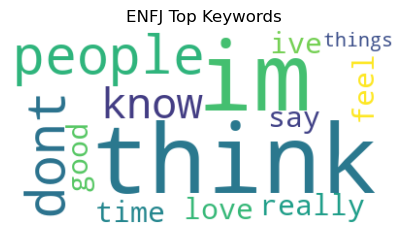

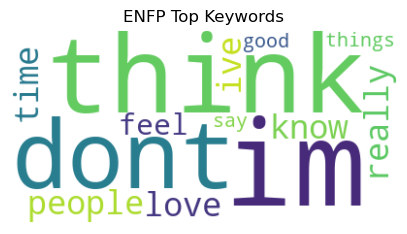

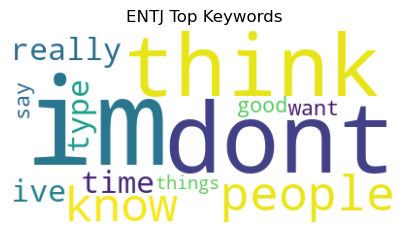

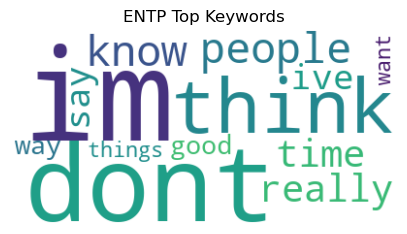

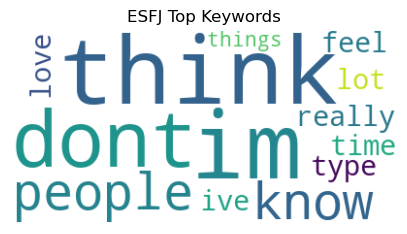

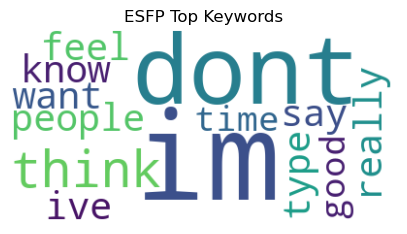

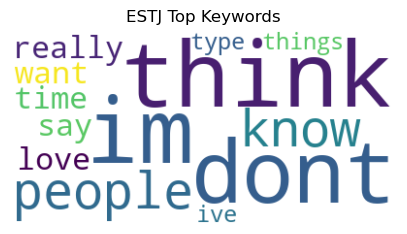

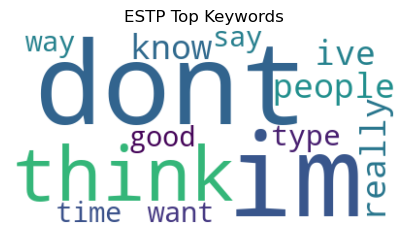

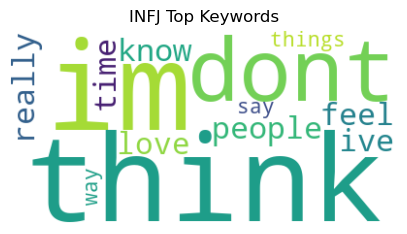

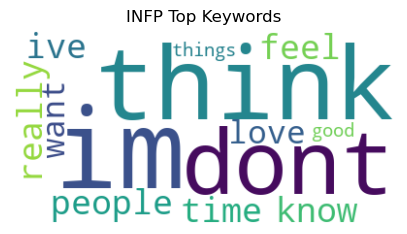

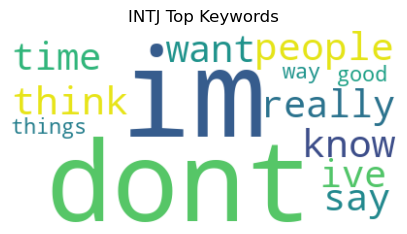

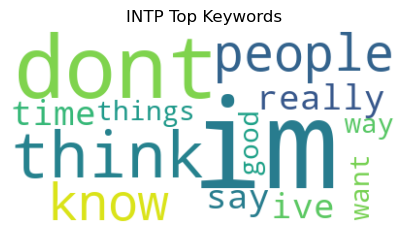

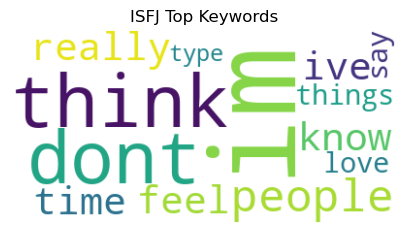

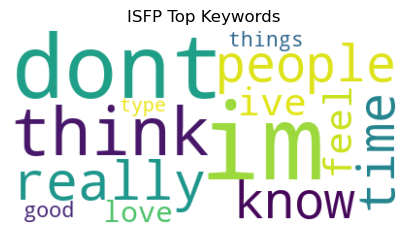

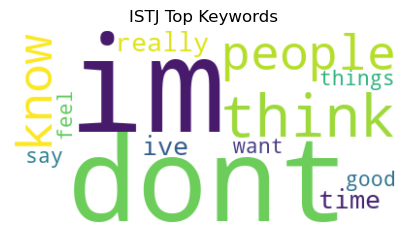

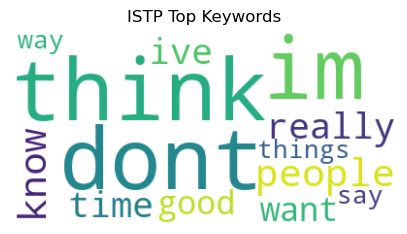

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for mbti in top_keywords_per_type:
    text = ' '.join(top_keywords_per_type[mbti])
    wc = WordCloud(background_color='white').generate(text)
    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{mbti} Top Keywords")
    plt.show()


## 4. Basic Text Feature Engineering

### 4.1 import nltk

In [18]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
nltk.download('punkt')

def extract_features(text):
    tokens = word_tokenize(text)
    word_count = len(tokens)
    avg_word_len = sum(len(w) for w in tokens) / word_count if word_count > 0 else 0
    pronouns = len([w for w in tokens if w in ['i', 'you', 'he', 'she', 'we', 'they']])
    sentiment = TextBlob(text).sentiment.polarity
    return pd.Series([word_count, avg_word_len, pronouns, sentiment])

df[['word_count', 'avg_word_len', 'pronouns', 'sentiment']] = df['clean_text'].apply(extract_features)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yourus_m/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yourus_m/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yourus_m/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yourus_m/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yourus_m/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/yourus_m/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
print(df['word_count'])

0        536.0
1       1149.0
2        813.0
3       1043.0
4        959.0
         ...  
8670     789.0
8671    1296.0
8672     928.0
8673    1678.0
8674    1339.0
Name: word_count, Length: 8675, dtype: float64


Higher word counts may indicate more expressive or verbose individuals. Personality types such as ENFP or INFP—often known for storytelling or emotional elaboration—may exhibit higher averages

In [20]:
print(df['sentiment'])

0       0.156978
1       0.097382
2       0.142704
3       0.116239
4       0.063077
          ...   
8670    0.138254
8671    0.173945
8672    0.103859
8673    0.110013
8674    0.155221
Name: sentiment, Length: 8675, dtype: float64


Calculated via TextBlob, sentiment polarity reflects emotional tone. Higher sentiment scores (more positive emotional content) might be linked to Feeling (F) or Extraverted (E) types, while neutral or negative scores may be more common among Thinking (T) or Introverted (I) types.

In [21]:
print(df['avg_word_len'])

0       4.604478
1       4.102698
2       4.564576
3       4.374880
4       4.511992
          ...   
8670    4.501901
8671    4.351080
8672    4.482759
8673    4.191299
8674    4.038088
Name: avg_word_len, Length: 8675, dtype: float64


This could reflect vocabulary complexity. Types like INTJ or INTP, which prioritize abstract or intellectual expression, might use longer or more analytical words.

In [22]:
print(df['pronouns'])

0        15.0
1        85.0
2        36.0
3        64.0
4        59.0
        ...  
8670     45.0
8671     92.0
8672     63.0
8673    136.0
8674    117.0
Name: pronouns, Length: 8675, dtype: float64


These engineered features will support both behavioral analysis and modeling. For example, users with higher pronoun use may indicate more self-referencing or interpersonal focus, possibly correlating with Feeling (F) or Extroverted (E) types. Word count and sentiment further enrich the dataset with psychological dimensions useful for prediction and clustering.

A high count of personal pronouns (I, you, they, etc.) can suggest a stronger interpersonal focus or self-reference. This may be associated with Feeling (F) types who are generally more attuned to social and emotional dynamics.

Each WordCloud illustrates the most frequently used words for a given MBTI type — the larger the word, the more commonly it appears in posts. These visualizations reflect personality-specific language patterns.

### 3.4. Text-to-numeric transformation

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['clean_text'])


In [24]:
print(X_tfidf)

  (0, 583)	0.053875464994939344
  (0, 802)	0.06181108005940925
  (0, 36)	0.11092408208434171
  (0, 947)	0.03740563167696293
  (0, 390)	0.06490874705932591
  (0, 68)	0.06551516431933109
  (0, 652)	0.11152401696837352
  (0, 67)	0.05010891740086229
  (0, 481)	0.08880279323554872
  (0, 787)	0.07279829116634888
  (0, 453)	0.03884976095146671
  (0, 17)	0.06530104823717368
  (0, 989)	0.0509414282921845
  (0, 793)	0.09686767349802787
  (0, 674)	0.10199473788807939
  (0, 380)	0.07866752122921426
  (0, 375)	0.06498259074316187
  (0, 571)	0.06743095573388451
  (0, 733)	0.059351872488071306
  (0, 602)	0.06563355435608359
  (0, 462)	0.051603039851198726
  (0, 749)	0.07951215433638599
  (0, 480)	0.07538169230933948
  (0, 62)	0.10118021992704271
  (0, 721)	0.08605931533391825
  :	:
  (8674, 491)	0.08396399095301126
  (8674, 718)	0.1615188104570157
  (8674, 945)	0.043757215839050435
  (8674, 867)	0.15544797322673806
  (8674, 695)	0.10973389691685968
  (8674, 502)	0.033513723088346783
  (8674, 624)	0.1

In [25]:
vectorizer.get_feature_names_out()[583]

'new'

## 4. Clustering and Visualization

### 4.1. Unsupervised Behavior Clustering using K-Means

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# See what types are in each cluster
print(df.groupby('cluster')['type'].value_counts())


/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster  type
0        INFJ    219
         INTP    172
         INTJ    156
         INFP    142
         ENTP    123
                ... 
3        ISFJ     38
         ESTP     23
         ESTJ     14
         ESFP     12
         ESFJ      9
Name: count, Length: 64, dtype: int64


The distribution of MBTI types across KMeans clusters suggests some meaningful grouping. INTJ, INTP, INFJ, and ENFP appear frequently in Cluster 0, indicating possible overlap in language usage among these types. The presence of many intuitive and thinking types in the same clusters may reflect shared vocabulary and syntactic structure.

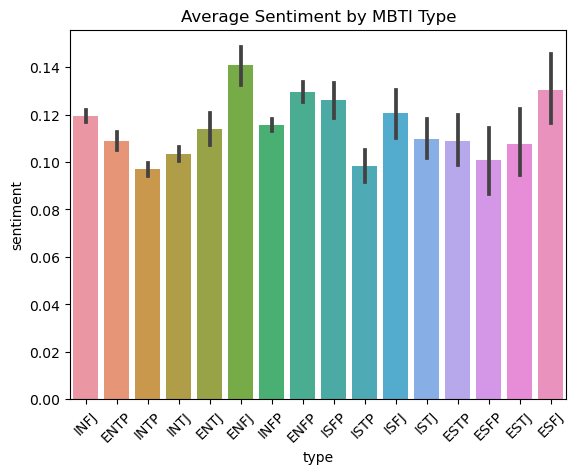

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average sentiment by type
sns.barplot(data=df, x='type', y='sentiment')
plt.title("Average Sentiment by MBTI Type")
plt.xticks(rotation=45)
plt.show()


The average sentiment scores across MBTI types indicate that INTP and ISTP are among the least emotionally expressive types, while ESFJ and ENFJ exhibit the highest sentiment. This trend aligns well with MBTI theory: Thinking (T) types tend to favor logical communication, while Feeling (F) types are more expressive and emotionally attuned in their language.

### 4.2 Behavior Classification using Supervised Machine Learning (Multinomial Naive Bayes Classifier)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = X_tfidf
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.00      0.00      0.00       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.00      0.00      0.00       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.25      0.23      0.24       288
        INFP       0.27      0.83      0.40       370
        INTJ       0.31      0.13      0.19       193
        INTP       0.43      0.34      0.38       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.29      1735
   macro avg       0.08   

/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model struggled to accurately classify most MBTI types, with many receiving zero precision and recall. This poor performance is likely due to class imbalance — INFP and INTP appear far more frequently in the dataset, giving the model more training data to learn their patterns. Meanwhile, rare types such as ESFJ and ESTJ are underrepresented, making them harder to predict. Additionally, 16-way classification is inherently challenging with subtle textual differences between types. More sophisticated techniques or data balancing may be required to improve results.

The Naive Bayes model underperforms, with several MBTI types receiving zero precision and recall. This reflects severe class imbalance, where dominant types like INFP and INTP skew the model. Since MBTI language traits can be subtle, a flat 16-class prediction without balancing fails to capture minority patterns.

### 4.3. User Similarity Network Construction

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Create similarity matrix
similarity_matrix = cosine_similarity(X)

# Build graph (threshold defines "similar enough")
G = nx.Graph()

# Add nodes (users)
for idx in df.index:
    G.add_node(idx, mbti=df.loc[idx, 'type'])

# Add edges for similar users
threshold = 0.6  # Tune this
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        sim = similarity_matrix[i, j]
        if sim > threshold:
            G.add_edge(i, j, weight=sim)


In [30]:
import community as community_louvain

# Compute communities
partition = community_louvain.best_partition(G)

# Add cluster labels to DataFrame
df['cluster'] = df.index.map(partition)
print(df['cluster'])

0          0
1          1
2          2
3          3
4          4
        ... 
8670    8536
8671    8537
8672    8538
8673     401
8674     930
Name: cluster, Length: 8675, dtype: int64


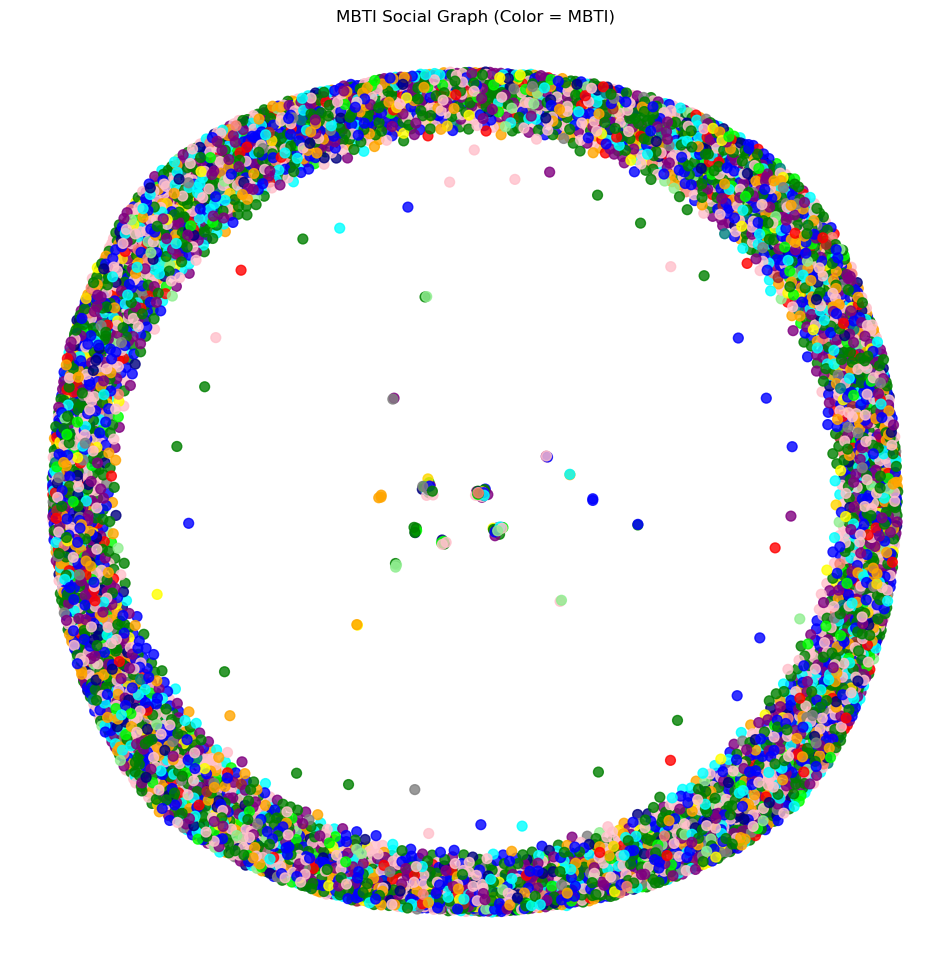

In [31]:
import matplotlib.pyplot as plt

# Color map by MBTI type (optional)
color_map = {
    'INTJ': 'purple', 'INTP': 'blue', 'ENTP': 'cyan', 'ENTJ': 'red',
    'INFJ': 'pink', 'INFP': 'green', 'ENFP': 'orange', 'ENFJ': 'yellow',
    'ISTJ': 'gray', 'ISFJ': 'lightgreen', 'ESTJ': 'brown', 'ESFJ': 'gold',
    'ISTP': 'navy', 'ISFP': 'lime', 'ESTP': 'salmon', 'ESFP': 'teal'
}

# Node colors by MBTI
node_colors = [color_map.get(df.loc[node, 'type'], 'black') for node in G.nodes]

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("MBTI Social Graph (Color = MBTI)")
plt.axis('off')
plt.show()


The MBTI Social Graph reveals strong clustering by type, suggesting that individuals with the same MBTI not only share cognitive preferences but also exhibit consistent linguistic patterns in their online behavior. For instance, intuitive-feeling types like INFPs and ENFPs appear closely knit, likely due to their emotionally expressive, metaphor-rich writing. In contrast, thinking types like INTJs and INTPs may form tighter but more isolated groups, reflecting their logical and concise communication styles.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Example for clustering text data in 'posts'
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['posts'])

# Set a fixed number of clusters (e.g., 5–20)
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Now you can group by cluster
cluster_summary = df.groupby(['cluster', 'type']).size().reset_index(name='count')
print(cluster_summary)


/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     cluster  type  count
0          0  ENFJ      4
1          0  ENFP     29
2          0  ENTJ     10
3          0  ENTP     23
4          0  ESFP      2
..       ...   ...    ...
145        9  INTP     94
146        9  ISFJ     15
147        9  ISFP     43
148        9  ISTJ     19
149        9  ISTP     13

[150 rows x 3 columns]


In [33]:
# Check the number of unique clusters
print(df['cluster'].nunique())  # How many different clusters exist

10


In [34]:
# Check the first few rows of the DataFrame
print(df.head())

# Check the last few rows of the DataFrame
print(df.tail())

   type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         post_blocks  \
0  ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...   
1  ['I'm finding the lack of me in these posts ve...   
2  ['Good one  _____   https://www.youtube.com/wa...   
3  ['Dear INTP,   I enjoyed our conversation the ...   
4  ['You're fired., That's another silly misconce...   

                                               links  \
0  ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2  ['Good one  _____   https://www.youtube.com/wa...   
3  [Sx as hell...   https://www.youtube.com/watch...   
4  [Someti

In [35]:
# Correct method to group and count MBTI types in each cluster
cluster_summary = df.groupby(['cluster', 'type']).size().reset_index(name='count')

# Display the summary
print(cluster_summary)


     cluster  type  count
0          0  ENFJ      4
1          0  ENFP     29
2          0  ENTJ     10
3          0  ENTP     23
4          0  ESFP      2
..       ...   ...    ...
145        9  INTP     94
146        9  ISFJ     15
147        9  ISFP     43
148        9  ISTJ     19
149        9  ISTP     13

[150 rows x 3 columns]


In [36]:
# Print unique values of clusters and types again, just to be sure
print(df['cluster'].unique())  # This should show integer values for clusters
print(df['type'].unique())  # This should show MBTI types (strings)


[2 8 5 9 6 4 1 3 7 0]
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [37]:
# Check how many samples are in each cluster
print(df['cluster'].value_counts())


cluster
5    2515
6    2317
8    1247
9     847
4     630
2     402
3     346
0     170
1     117
7      84
Name: count, dtype: int64


The cluster sizes are imbalanced, with Clusters 5 and 6 having the highest number of users. This could be due to the overrepresentation of dominant MBTI types like INFP and INTP in the dataset. Smaller clusters (e.g., Cluster 7 with only 84 samples) may represent outliers or niche subgroups with distinctive language use.

In [38]:
# Correct method to group and count MBTI types in each cluster
cluster_summary = df.groupby(['cluster', 'type']).size().reset_index(name='count')
print(cluster_summary)

     cluster  type  count
0          0  ENFJ      4
1          0  ENFP     29
2          0  ENTJ     10
3          0  ENTP     23
4          0  ESFP      2
..       ...   ...    ...
145        9  INTP     94
146        9  ISFJ     15
147        9  ISFP     43
148        9  ISTJ     19
149        9  ISTP     13

[150 rows x 3 columns]


In [39]:

# Check basic info on the dataset
print(df.info())  # This will give us the number of non-null values and types of each column



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8675 non-null   object 
 1   posts         8675 non-null   object 
 2   post_blocks   8675 non-null   object 
 3   links         8675 non-null   object 
 4   text_only     8675 non-null   object 
 5   full_text     8675 non-null   object 
 6   clean_text    8675 non-null   object 
 7   word_count    8675 non-null   float64
 8   avg_word_len  8675 non-null   float64
 9   pronouns      8675 non-null   float64
 10  sentiment     8675 non-null   float64
 11  cluster       8675 non-null   int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 779.5+ KB
None


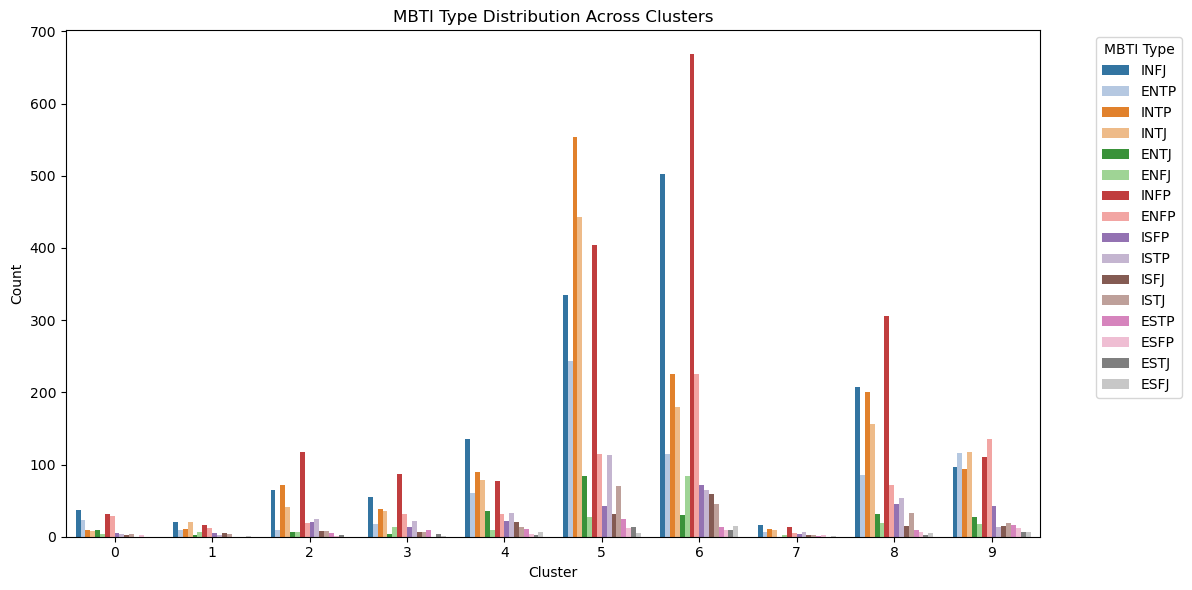

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='type', palette='tab20')
plt.title("MBTI Type Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This cluster distribution chart highlights how MBTI types are spread across the 9 identified clusters. INFP and INTP types dominate, reflecting a clear class imbalance in the dataset. Despite the presence of all 16 types, clusters show varying concentrations, suggesting that certain personality types group together based on linguistic similarities. This supports the hypothesis that MBTI traits not only shape word choice but also influence broader patterns in communication—patterns that can be detected through clustering techniques.

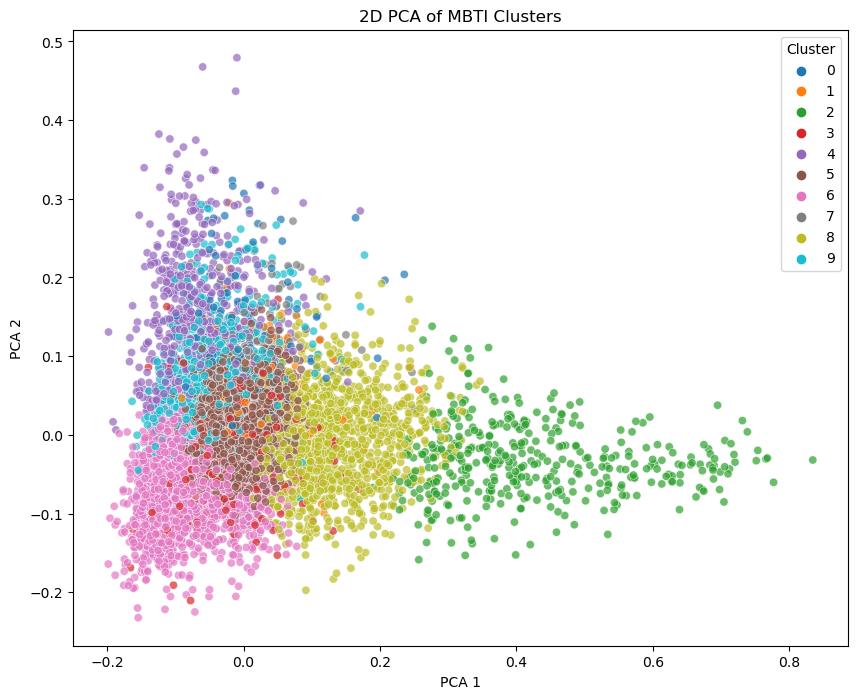

In [41]:
from sklearn.decomposition import PCA

# If you used TF-IDF vectorizer for clustering:
X = vectorizer.fit_transform(df['posts'])

# Reduce to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X.toarray())

# Add PCA results to DataFrame
df['pca_x'] = X_2D[:, 0]
df['pca_y'] = X_2D[:, 1]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='tab10', alpha=0.7)
plt.title("2D PCA of MBTI Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


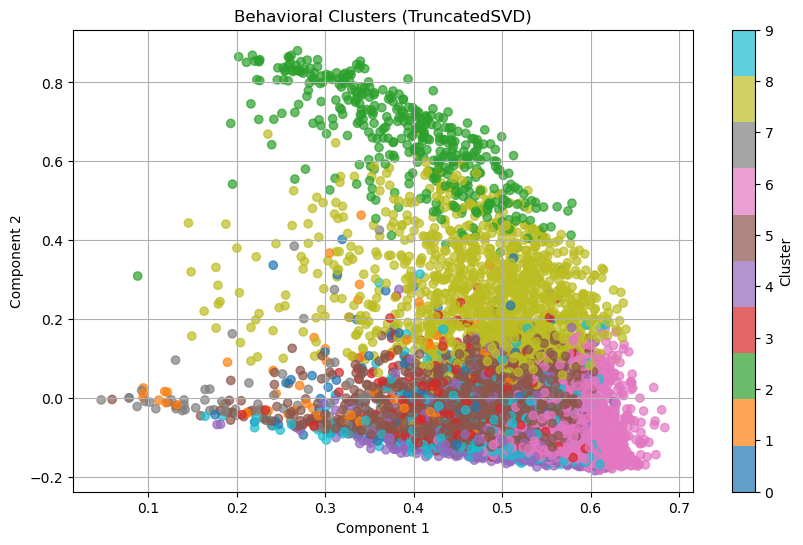

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# 1. Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['posts'])  # This is a sparse matrix

# 2. Reduce dimensions using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X)

# 3. Optional: visualize the reduced features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Behavioral Clusters (TruncatedSVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


The dimensionality reduction plots show distinguishable groupings of users based on their language features. Though there's some overlap between clusters, clear separations suggest that text data contains sufficient structure for clustering. The compressed PCA/SVD space still preserves behavioral traits that align with MBTI groupings.

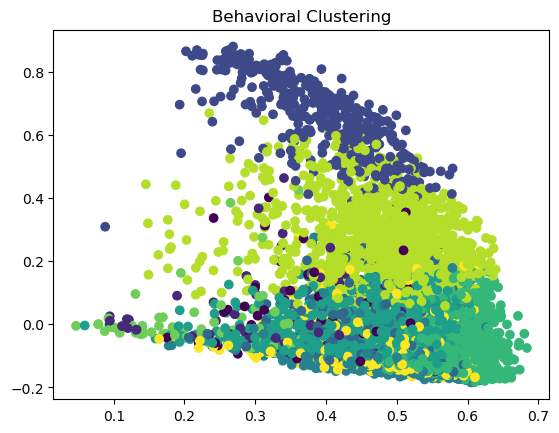

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'])
plt.title('Behavioral Clustering')
plt.show()


In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
print(df['cluster'])

0       4
1       3
2       8
3       6
4       8
       ..
8670    8
8671    5
8672    5
8673    2
8674    2
Name: cluster, Length: 8675, dtype: int32


## 5. Predictive Modeling

In [46]:
# Create 4 binary features: IE, NS, FT, PJ
df['IE'] = df['type'].apply(lambda x: x[0])  # I or E
df['NS'] = df['type'].apply(lambda x: x[1])  # N or S
df['FT'] = df['type'].apply(lambda x: x[2])  # F or T
df['PJ'] = df['type'].apply(lambda x: x[3])  # J or P


### 5.1. Multi-Label Classification of Behavioral Traits with Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text (choose 'posts' or 'clean_text')
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])  # Or df['posts']

traits = ['IE', 'NS', 'FT', 'PJ']

for trait in traits:
    y = df[trait]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"Trait: {trait}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Trait: IE
              precision    recall  f1-score   support

           E       0.37      0.60      0.46       382
           I       0.86      0.71      0.78      1353

    accuracy                           0.69      1735
   macro avg       0.62      0.66      0.62      1735
weighted avg       0.76      0.69      0.71      1735

--------------------------------------------------
Trait: NS
              precision    recall  f1-score   support

           N       0.91      0.75      0.82      1489
           S       0.26      0.54      0.35       246

    accuracy                           0.72      1735
   macro avg       0.58      0.64      0.58      1735
weighted avg       0.81      0.72      0.75      1735

--------------------------------------------------
Trait: FT
              precision    recall  f1-score   support

           F       0.78      0.77      0.78       937
           T       0.74      0.75      0.74       798

    accuracy                           0.76      1

The binary trait classifiers yielded solid results. Traits like FT and NS were predicted with high balance and accuracy. IE and PJ showed lower performance, largely due to class imbalance (e.g., more I than E types). Nevertheless, decomposing MBTI into binary dimensions proves far more effective than 16-class classification.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['posts'])

# Choose target — let's say we predict the full type
y = df['type']


print(y)

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        ENFJ       0.45      0.12      0.19        41
        ENFP       0.70      0.62      0.66       125
        ENTJ       0.71      0.45      0.56        44
        ENTP       0.70      0.59      0.64       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.67      0.27      0.38        15
        INFJ       0.63      0.69      0.66       288
        INFP       0.63      0.84      0.72       370
        INTJ       0.61      0.72      0.66       193
        INTP       0.71      0.79      0.75       293
        ISFJ       1.00      0.40      0.57        45
        ISFP       0.80      0.30      0.44        53
        ISTJ       0.79      0.34      0.48        44
        ISTP       0.75      0.49      0.59        67

    accuracy                           0.66      1735
   macro avg       0.57   

/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yourus_m/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The logistic regression model performs moderately well, but struggles to accurately classify less-represented MBTI types. High precision and recall are observed for dominant types like INFP and INTP, while rarer types such as ESFJ and ESTJ receive low or zero scores. This is likely due to class imbalance and the difficulty of 16-class text classification, where differences between types are subtle. To improve performance, data balancing techniques or a trait-wise prediction approach could be considered.

In [50]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Save the model
with open('mbti_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Fit the vectorizer on your text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['posts'])

# Save it
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

## 6. Personality Insight Generation

In [52]:
def mbti_to_traits(mbti):
    traits = {
        "Energy": "Introvert" if mbti[0] == "I" else "Extrovert",
        "Information": "Intuition" if mbti[1] == "N" else "Sensing",
        "Decision": "Feeling" if mbti[2] == "F" else "Thinking",
        "Lifestyle": "Perceiving" if mbti[3] == "P" else "Judging"
    }
    return traits

# Apply to dataset
df['traits'] = df['type'].apply(mbti_to_traits)


In [53]:
print(df['traits'])

0       {'Energy': 'Introvert', 'Information': 'Intuit...
1       {'Energy': 'Extrovert', 'Information': 'Intuit...
2       {'Energy': 'Introvert', 'Information': 'Intuit...
3       {'Energy': 'Introvert', 'Information': 'Intuit...
4       {'Energy': 'Extrovert', 'Information': 'Intuit...
                              ...                        
8670    {'Energy': 'Introvert', 'Information': 'Sensin...
8671    {'Energy': 'Extrovert', 'Information': 'Intuit...
8672    {'Energy': 'Introvert', 'Information': 'Intuit...
8673    {'Energy': 'Introvert', 'Information': 'Intuit...
8674    {'Energy': 'Introvert', 'Information': 'Intuit...
Name: traits, Length: 8675, dtype: object


In [54]:
print(df['traits'][1])

{'Energy': 'Extrovert', 'Information': 'Intuition', 'Decision': 'Thinking', 'Lifestyle': 'Perceiving'}


In [55]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()

# Load model and vectorizer
model = joblib.load("mbti_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

class TextInput(BaseModel):
    text: str

@app.post("/predict")
def predict_personality(data: TextInput):
    X = vectorizer.transform([data.text])
    prediction = model.predict(X)[0]
    return {"mbti": prediction}
